# この課題の目的

アンサンブル学習について理解する
EDAをするだけでなく、適切にEDAの分析結果を使えるようにする
以下の要件をすべて満たしていた場合、合格とします。
※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# アンサンブル学習

<br>今回使用するデータはkaggleのmalware prediction（ウイルス検知です。
<br>KernelsやDiscussionは自由に参照して構いません。良いアプローチやコードに触れることも重要です。
<br>この課題は大きく2つに別れています。問題１〜5を1日目、問題6（グループワーク）を2日目にやってもらいます。
<br>問題１〜5までを解いたnotebookを最終提出物とします。

## 問題１
<br>評価指標
<br>このコンペの評価指標はAUCと呼ばれるROC曲線の面積になります。ここでは復習も兼ねて、
<br>以下の点を意識しながら調査し、notebookに記述してください。
<br>
<br>・なぜ閾値が存在するのか？
<br>→閾値がなければ、出力されるAUC値は連続値であるため、分類問題に変換できないため。
<br>
<br>・ROC曲線の縦軸と横軸は何を意味するか？
<br>→False Positive Rate（偽陽性率）と横軸にTrue Positive Rate（真陽性率）を縦軸
<br>
<br>・ROC曲線はどのような形状が理想的だと言えるか？
<br>→閾値を変化させたときの偽陽性率と真陽性率による各点を結んだものがROC曲線
<br>
<br>・機械学習における、分類タスクの指標には他にもMCC（マシューズ相関係数）があります。
<br>MCCについて他の指標と比較しながら説明してください。（主にどのような場面で発揮する評価指標か、F1スコアとの違いなど）
<br>→MCCの定義は、((TP x TN) - (FP x FN)) / sqrt((TP + FP) x (TP + FN) x (TN + FP) x (TN + FN))であり、
<br>正負が不均衡なデータでの２値分類モデルの精度の評価にはマシューズ相関係数を使用するのが一般的である。

## 問題2
<br>EDA
<br>仮説を立てて（予測をして）から始めましょう。仮説を立てるにはある程度のドメインの勉強は必要です。
<br>分野に詳しくなければ特徴量について検索しましょう。今回は出力するグラフの個数に制限はありません。
<br>
<br>その代わり、一つ一つの分析に根拠をもち、得られた結果についてそのグラフが何を意味しているのかをしっかり述べてください。
<br>以下に仮説、EDAの例を示します。
<br>仮説の例
<br>osは重要そう。定期的にosを更新しているかどうかなど。
<br>国も重要そう。日本や中国などネットのインフラが整っているほどマルウェア感染リスクは、高まりそう。
<br>Hastpmも重要そう。マザーボードにつけられているセキュリティ対策用のチップ。
<br>https://docs.microsoft.com/ja-jp/windows/security/information-protection/tpm/how-windows-uses-the-tpm
<br>firewallも重要そう。だが直接的にはマルウェアとは関係ない。
<br>https://it-trend.jp/firewall/article/firewallcannot
<br>EDAのフロー例1
<br>以上の仮説から、OSver、 firewall、　Hastpm 、 Isprotected、　IsBata、 CountryIDを特徴量として選択する。
<br>trainデータの各特徴量の欠損比率を確認する。
<br>欠損の割合から欠損は補完せずに削除する。
<br>モデルを決定木として学習させる。
<br>説明
<br>My EDA - I want to see all! | Kaggle
<br>
<br>上記のカーネルはこのコンペにおいて最も参考にされているカーネルの１つです。このカーネルの3. Correlationsの部分で

#### 仮説
国、都市、地域、企業などのカテゴリデータが大きな影響を与えていそうである。
<br>これは、自分がクラッカーだったらと考えたとき、狙うターゲットは明確化すると考えたからである。
<br>クラッキングを行う費用対効果で言えば、できれば、所得水準の高いコミュニティを攻撃した方が、効果が高そうと考えれる。
<br>国としては、アメリカ、中国、ヨーロッパ諸国であり、都市はその主要都市、つまりサンフランシスコ、シアトル、ニューヨーク、ロサンゼルスなどを
<br>標的にするだろうと考える。

corr = train_small.corr()['HasDetections']

と実装されていますが、明らかに不自然なことをしています。不自然だと思われる理由を述べてください。

#### 回答
相関係数は、連続値同士の関係性を俯瞰することに優れた指標であり、カテゴリデータの関係性をみることには適していない。
<br>カテゴリデータの関係性を俯瞰するためには、カイ自乗検定（カテゴリデータ同士）、もしくはt検定、分散分析を用いるべきである。

## 問題3
<br>コーディング
<br>単一モデルで学習して推定を行ってください。また、交差検証、グリッドサーチも行うこと。
<br>ここで1つSubmitを行ってください。（現在開催中のコンペであり、1日の提出回数に制限があることに注意してください。）

### 交差検証

### グリッドサーチ

## 問題4
<br>2種類のアンサンブル学習の効果を確認しましょう。
<br>
<br>バギング
<br>単一のモデルはLGBMやXGBなどのアンサンブルモデルではなく、SVMやロジスティック回帰、決定木などのシンプルなモデルにしてください。
<br>
<br>説明
<br>バギングにはSoft VotingとHard Votingがあります。それぞれについて説明してください。
<br>データ全てを使うのではなく、その一部を使って学習し、それを何度も繰り返して最後に合わせる方法がバギングである。
<br>soft voting : 各モデルの予測確率の平均
<br>hard voting : 単純に多数決
<br>
<br>バギングする際に選ぶモデルはどういった組み合わせにすると良いか考察してください。今後アンサンブル学習を利用していく上で非常に重要な点です。
<br>
<br>似たモデルを選ばない。
<br>
<br>コーディング
<br>scikit-learnを用いて、バギング（Soft Voting）を実装してください。
<br>各単一モデル（弱学習器）はなるべく異なるモデルにしましょう。
<br>sklearn.ensemble.VotingClassifier — scikit-learn 0.20.2 documentation
<br>
<br>ブースティング
<br>説明
<br>バギングとの違いについて説明してください。
<br>Boostingとは、弱学習器をboostして、そのアルゴリズムよりも強い学習アルゴリズムをつくること。
<br>・並列処理はできない。
<br>・学習器を連続的に学習させて、より精度が向上するように修正していくことです。
<br>
<br>コーディング
<br>ブースティングの1つにマイクソフトが開発したLightGBMというモデルが存在します。
<br>LGBMで学習・予測をしてください。なおLGBMは２つの書き方があります。以下のURLを参照してください。どちらでも構いません。
<br>Python API — LightGBM documentation Scikit-learn API
<br>Python API — LightGBM documentation Training API

# 問題6

案件模擬（2日目の10:00~17:30）
マイクロソフトに以下のようなことを依頼されたとします。
「精度も欲しいが、最終的にはmalwareに感染されないようなデバイスもしくはソフトウェアにするにはどうすれば良いか（どのようなデバイス・ソフトウェアか）を知りたい。」
上記課題に取り組む場合の要件を定め、分析結果の報告をしてください。報告なので、結果だけでなく、根拠のある分析プロセスを提示すること。なお以下のことを前提とします。
報告する相手の中にデータ分析に詳しい人がいる（みなさんと同程度の実力）。
すでに各々が行ったEDAの結果は用いて良い。
EDAをする際はkaggleのカーネルも用いて良い。（発表時に用いるのはNG。）
発表時間は15分程度とする。メンターや他のグループとの質疑応答含め30分。
回答はグループで作成し、グループで作成したnotebookをプロジェクターで表示しながら発表してください（発表者は誰でも良い）。

仮説：　国によって変わる。　→　結論フィルターをONにする広報活動
→　ファイルやアプリのダウンロードの際、フィルターをかけるかどうか？
マルウェア感染率の高い国と低い国を比べて「SmartScreen」ごとの感染率をみる
感染率高い国　香港 低い国　インド
smartscreenの設定は三つある
RequireAdmin 一番強いフィルダー　管理者権限が必要 Warm 　ダウンロードなどの際に警告がでる Off フィルタなし
smartscreenはカテゴリデータでユニークな値が２０ほどあるので、上の三つの設定に統合する

感染率が低いインドはoffの割合が低い、　感染率が高い香港は、offの割合が高い
<br>結論　フィルターをonにする広報活動をすべきである

# Microsoft Malware Prediction
#### Can you predict if a machine will soon be hit with malware?

The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways.

With more than one billion enterprise and consumer customers, Microsoft takes this problem very seriously and is deeply invested in improving security.

As one part of their overall strategy for doing so, Microsoft is challenging the data science community to develop techniques to predict if a machine will soon be hit with malware. As with their previous, Malware Challenge (2015), Microsoft is providing Kagglers with an unprecedented malware dataset to encourage open-source progress on effective techniques for predicting malware occurrences.

Can you help protect more than one billion machines from damage BEFORE it happens?

Acknowledgements
This competition is hosted by Microsoft, Windows Defender ATP Research, Northeastern University College of Computer and Information Science, and Georgia Tech Institute for Information Security & Privacy.

Microsoft	Microsoft contacts
Rob McCann (Robert.McCann@microsoft.com)
Christian Seifert (chriseif@microsoft.com)
Susan Higgs (Susan.Higgs@microsoft.com)
Matt Duncan (Matthew.Duncan@microsoft.com)
Northeastern	Northeastern University contact
Mansour Ahmadi (m.ahmadi@northeastern.edu)
GeorgiaTech	Georgia Tech contacts
Brendan Saltaformaggio (brendan@ece.gatech.edu)
Taesoo Kim (taesoo@gatech.edu)

In [3]:
# improt module
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# cokumns
pd.set_option("display.max_colwidth", 3000)

# index
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [4]:
# improt data
%time df_train = pd.read_csv("train.csv")

<string>:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1min 42s, sys: 40.8 s, total: 2min 22s
Wall time: 2min 14s


In [5]:
# function of reduce memory
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
# reduce memory usage
df_train = reduce_mem_usage(df_train)

Mem. usage decreased to 3028.92 Mb (46.4% reduction)


In [7]:
# check the shape
df_train.shape

(8921483, 83)

In [8]:
# check the shape
df_train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2340.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2404.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2272.0,NaN,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,P

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    object
ProductName                                          object
EngineVersion                                        object
AppVersion                                           object
AvSigVersion                                         object
IsBeta                                               int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
DefaultBrowsersIdentifier                            float16
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                                   

In [11]:
df_train['HasDetections'].unique()

array([0, 1])

In [12]:
df_train['HasDetections'].value_counts()

0    4462591
1    4458892
Name: HasDetections, dtype: int64

In [13]:
df_train['HasDetections'].mode()

0    0
dtype: int8

In [14]:
# sns.catplot(x="HasDetections", col="CountryIdentifier", data=df_train, kind="count", height=4, aspect=.7)

In [15]:
region = ["HasDetections", "CountryIdentifier",'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier']
df_region = df_train.loc[:, region]

df_region.head()

,HasDetections,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier
0,0,29,128035.0,18.0,35.0
1,0,93,1482.0,18.0,119.0
2,0,86,153579.0,18.0,64.0
3,1,88,20710.0,NaN,117.0
4,1,18,37376.0,NaN,277.0


In [16]:
df_country = df_region.groupby(by='CountryIdentifier').mean().sort_values(by=['HasDetections'])
list_country = np.array(df_country.index)

df_Singapore = df_train.loc[df_train['CountryIdentifier']==104, :]
df_h_re = pd.DataFrame(df_Singapore['SmartScreen'].value_counts())
print(df_h_re.sum())

SmartScreen    16460
dtype: int64


In [17]:
print(list_country)

[ 92  98 213  25  75  72  65  14 114  82  74 119 145 123  46 109 156  71
 161 134 219  96 192 135 126 216  62  30 212   4  48 189  28  17  13  78
 152 168 162 116  10 106  87  90  67 210 150 137  58  53  64  69  49  63
 138  39 202   1 125 180 157  11  52 113  99  83 178 120 177 102  19  36
 204  84 144  50 101  12 147 206  38  40 208 124  22 220   2 153 221 117
  42 199 169  80 143  73 122  16  56 108 170 175 160  35 154 173 164 130
  70  51  68  54   6 185 107   5  97 207  66 118 167  32 186 149 142  45
  93  60  26  77 115 128 136 171 203  34   3  15 140 184   8 112  86  91
  47 165 110 200  29   9 129  41 211  55  76 201  43 222 209 194 176 151
 121 146 179 133 183 158 141 127 103 111 174 196 205  81 166 172  37 181
  20  88  24  18  44  33 188 155  57 182  23 105 215 159 195  85 100  21
 191 197  79 148 132  59  31 163 193  94 218 187   7  27  89 198  61 214
  95 139 217 190 104 131]


In [18]:
df_region.groupby(by='CountryIdentifier').mean().sort_values(by=['HasDetections'])

,HasDetections,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier
CountryIdentifier,,,,
92,0.258831,39229.910156,27.000000,268.2500
98,0.261949,124578.078125,26.703125,261.0000
213,0.267076,41268.062500,44.968750,278.0000
25,0.269068,64628.343750,26.906250,173.2500
75,0.272162,103750.046875,27.000000,99.3125
72,0.272640,124734.015625,19.203125,262.0000
65,0.276080,133792.718750,27.000000,93.6875
14,0.289238,88336.437500,25.062500,168.5000
114,0.291525,124548.257812,27.312500,193.8750


In [19]:
country_name = pd.read_excel('microsoft_malware.xlsx', sheetname='country_name')
country_name

/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Geographical location identifier (Hex),Geographical location identifier (decimal),Location (Short Name),Location (Long Name)
0,0x2,2,Antigua and Barbuda,Antigua and Barbuda
1,0x3,3,Afghanistan,Islamic Republic of Afghanistan
2,0x4,4,Algeria,Democratic and Popular Republic of Algeria
3,0x5,5,Azerbaijan,Republic of Azerbaijan
4,0x6,6,Albania,Republic of Albania
5,0x7,7,Armenia,Republic of Armenia
6,0x8,8,Andorra,Principality of Andorra
7,0x9,9,Angola,Republic of Angola
8,0xa,10,American Samoa,Territory of American Samoa
9,0xb,11,Argentina,Argentine Republic


In [20]:
df_region.groupby(by='CityIdentifier').mean().sort_values(by=['HasDetections']).tail()

,HasDetections,CountryIdentifier,OrganizationIdentifier,GeoNameIdentifier
CityIdentifier,,,,
116771.0,1.0,66.0,27.0,89.0
142623.0,1.0,12.0,NaN,15.0
116772.0,1.0,203.0,18.0,255.0
142644.0,1.0,171.0,18.0,211.0
133873.0,1.0,107.0,27.0,138.0


In [21]:
df_train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8889165.0,8.921483e+06,433438.0,8.885262e+06,8885262.0,8885262.0,8.921483e+06,8.921483e+06,8.596074e+06,6169965.0,8921270.0,8.921483e+06,8.921483e+06,8.921483e+06,8885439.0,8.921483e+06,8383724.0,8862589.0,8830133.0,8.910645e+06,8826005.0,8.819250e+06,8880177.0,8880170.0,8880140.0,8.868467e+06,8.868481e+06,8.921483e+06,8.840950e+06,8.874349e+06,8874497.0,8874497.0,8.652728e+06,8.921483e+06,8.921483e+06,8861399.0,8.921483e+06,8.921483e+06,1512724.0,8760960.0,3254158.0,8738226.0,8.761350e+06,8.921483e+06,3261780.0,8905530.0,8.921483e+06,8.921483e+06,8850140.0,8618032.0,8618032.0,8.921483e+06
mean,7.509962e-06,NaN,1.733378e-02,NaN,4.784002e+04,NaN,NaN,9.879711e-01,1.080490e+02,8.126650e+04,NaN,NaN,1.228161e+02,1.571997e+04,5.751534e+02,NaN,2.891896e-05,0.0,NaN,NaN,1.302773e+01,NaN,2.391425e+05,NaN,NaN,NaN,3.089053e+06,3.773682e+05,7.718728e-02,6.115257e+03,NaN,NaN,NaN,1.123782e+09,1.583483e+04,9.730490e+02,NaN,6.046534e+01,5.452008e-04,0.0,0.0,0.0,NaN,3.302793e+04,4.860229e-01,0.0,0.0,1.255431e-01,3.807091e-02,NaN,NaN,NaN,4.997927e-01
std,2.740421e-03,0.0,1.305118e-01,NaN,1.403237e+04,0.0,0.0,1.090149e-01,6.304706e+01,4.892339e+04,0.0,NaN,6.932125e+01,2.190685e+03,2.480847e+02,0.0,5.377558e-03,0.0,NaN,0.0,9.867771e+03,NaN,7.194786e+04,0.0,0.0,NaN,4.451634e+09,3.258791e+05,2.668884e-01,5.115821e+03,0.000000e+00,NaN,NaN,1.887782e+09,1.961743e+03,2.931971e+03,0.0,4.499992e+01,2.334317e-02,0.0,0.0,0.0,NaN,2.120691e+04,4.998046e-01,0.0,0.0,3.313338e-01,1.913675e-01,0.0,0.0,0.0,5.000000e-01
min,0.000000e+00,0.0,0.000000e+00,1.0,3.000000e+00,0.0,0.0,0.000000e+00,1.000000e+00,5.000000e+00,1.0,1.0,1.000000e+00,7.600000e+03,1.600000e+01,0.0,0.000000e+00,0.0,1.0,0.0,0.000000e+00,1.0,1.000000e+00,1.0,1.0,2.0,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,7.001953e-01,-1.0,-1.0,0.000000e+00,7.600000e+03,0.000000e+00,1.0,1.000000e+00,0.000000e+00,0.0,0.0,0.0,2.0,3.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.000000e+00
25%,0.000000e+00,7.0,0.000000e+00,788.0,4.948000e+04,1.0,1.0,1.000000e+00,5.100000e+01,3.682500e+04,18.0,89.0,7.400000e+01,1.506300e+04,2.560000e+02,1.0,0.000000e+00,0.0,111.0,1.0,1.000000e+00,1443.0,1.896920e+05,2.0,5.0,1998.0,2.393720e+05,1.207750e+05,0.000000e+00,4.096000e+03,1.389844e+01,1366.0,768.0,0.000000e+00,1.506300e+04,1.670000e+02,8.0,3.100000e+01,0.000000e+00,0.0,0.0,0.0,142.0,1.315600e+04,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,3.0,0.000000e+00
50%,0.000000e+00,7.0,0.000000e+00,1632.0,5.344700e+04,1.0,1.0,1.000000e+00,9.700000e+01,8.237300e+04,27.0,181.0,8.800000e+01,1.629900e+04,7.680000e+02,1.0,0.000000e+00,0.0,117.0,1.0,1.000000e+00,2102.0,2.474580e+05,4.0,5.0,2500.0,4.769400e+05,2.495000e+05,0.000000e+

In [22]:
df_Hongkong = df_train.loc[df_train['CountryIdentifier']==104, :]
df_smartscreen_Hongkong = df_Hongkong.groupby(by='SmartScreen').mean().sort_values(by=['SmartScreen']) 
df_smartscreen_Hongkong['HasDetections']

SmartScreen
&#x01;          1.000000
&#x02;          0.666667
Block           0.571429
ExistsNotSet    0.805160
Off             0.605856
Prompt          0.509091
RequireAdmin    0.528684
Warn            0.626984
off             0.857143
Name: HasDetections, dtype: float64

In [23]:
df_Hongkong.isnull().sum()

MachineIdentifier                                        0
ProductName                                              0
EngineVersion                                            0
AppVersion                                               0
AvSigVersion                                             0
IsBeta                                                   0
RtpStateBitfield                                       104
IsSxsPassiveMode                                         0
DefaultBrowsersIdentifier                            27520
AVProductStatesIdentifier                               32
AVProductsInstalled                                     32
AVProductsEnabled                                       32
HasTpm                                                   0
CountryIdentifier                                        0
CityIdentifier                                        1738
OrganizationIdentifier                               13133
GeoNameIdentifier                                       

In [24]:
df_Singapore = df_train.loc[df_train['CountryIdentifier']==113, :]
df_smartscreen_Singapore = df_Singapore.groupby(by='SmartScreen').mean().sort_values(by=['SmartScreen']) 
df_smartscreen_Singapore['HasDetections']

SmartScreen
Block           0.545455
ExistsNotSet    0.822014
Off             0.431373
Prompt          0.333333
RequireAdmin    0.372335
Warn            0.456522
Name: HasDetections, dtype: float64

In [25]:
df_Singapore.groupby(by='SmartScreen').count()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
SmartScreen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Block,11,11,11,11,11,11,11,11,2,11,11,11,11,11,11,5,11,11,11,11,11,11,11,11,11,11,11,11,0,10,11,11,11,11,11,11,11,11,11,11,0,11,11,11,11,11,11,11,11,11,11,4,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,11,11,4,11,11,11,4,11,11,11,11,11,11,11
ExistsNotSet,427,427,427,427,427,427,425,427,18,426,426,426,427,427,426,145,427,427,427,427,427,427,427,427,427,427,426,427,0,409,422,426,427,427,427,427,425,425,425,425,0,425,426,425,427,425,427,427,427,427,427,168,418,427,427,427,427,427,427,427,427,427,427,427,427,427,427,71,424,427,211,422,423,427,211,427,427,427,425,424,424,427
Off,51,51,51,51,51,51,51,51,0,51,51,51,51,51,51,10,51,51,51,51,51,51,51,51,51,51,51,51,0,50,51,51,51,51,51,51,51,51,51,51,0,51,51,51,51,51,51,51,51,51,51,20,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,8,51,51,23,51,51,51,23,51,51,51,51,51,51,51
Prompt,9,9,9,9,9,9,9,9,1,9,9,9,9,9,9,4,9,9,9,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9,9,9,9,9,5,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,2,9,9,8,9,9,9,8,9,9,9,9,9,9,9
RequireAdmin,2017,2017,2017,2017,2017,2017,2006,2017,67,2010,2010,2010,2017,2017,2010,715,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2010,2017,0,1917,2007,2016,2014,2017,2017,2012,2011,2016,2016,2016,3,2016,2017,2016,2017,2014,2017,2015,2015,2015,2017,980,1993,2017,2017,2017,2017,2017,2017,2017,2017,2010,2017,2017,2017,2017,2017,432,2005,2017,1205,1995,2006,2017,1207,2016,2017,2017,2016,2012,2012,2017
Warn,46,46,46,46,46,46,46,46,1,46,46,46,46,46,46,16,46,46,46,46,46,46,46,46,46,46,46,46,0,44,45,46,46,46,46,45,45,46,46,46,0,46,46,46,46,46,46,46,46,46,46,15,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,5,46,46,17,45,45,46,17,46,46,46,46,46,46,46


In [26]:
df_Singapore.isnull().sum()

MachineIdentifier                                       0
ProductName                                             0
EngineVersion                                           0
AppVersion                                              0
AvSigVersion                                            0
IsBeta                                                  0
RtpStateBitfield                                       16
IsSxsPassiveMode                                        0
DefaultBrowsersIdentifier                            3302
AVProductStatesIdentifier                               9
AVProductsInstalled                                     9
AVProductsEnabled                                       9
HasTpm                                                  0
CountryIdentifier                                       0
CityIdentifier                                          9
OrganizationIdentifier                               2288
GeoNameIdentifier                                       0
LocaleEnglishN

(array([ 651350., 1447949., 1034964.,  771390., 1144773.,  245211.,
         973087., 1181836.,  352895., 1118028.]),
 array([  1. ,  23.1,  45.2,  67.3,  89.4, 111.5, 133.6, 155.7, 177.8,
        199.9, 222. ]),
 <a list of 10 Patch objects>)

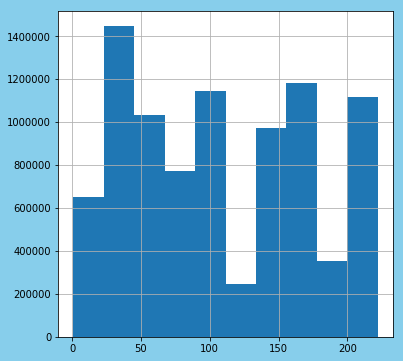

In [27]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
# ax.set_yscale('log') 
plt.grid()

# setting
scatter_color = ['red', 'green']
contourf_color = ['pink', 'skyblue']
n_class = 2

plt.hist(df_train['CountryIdentifier'])

/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1158538.,  847871.,  582783.,  895928.,  926967.,  974074.,
         758842.,  843298.,  981245.,  626528.]),
 array([5.000000e+00, 1.680070e+04, 3.359640e+04, 5.039210e+04,
        6.718780e+04, 8.398350e+04, 1.007792e+05, 1.175749e+05,
        1.343706e+05, 1.511663e+05, 1.679620e+05], dtype=float32),
 <a list of 10 Patch objects>)

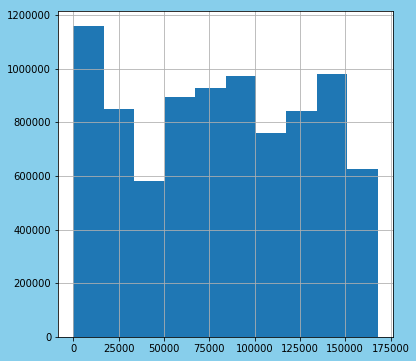

In [28]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
# ax.set_yscale('log') 
plt.grid()

# setting
scatter_color = ['red', 'green']
contourf_color = ['pink', 'skyblue']
n_class = 2

plt.hist(df_train['CityIdentifier'])

#### missing value

In [29]:
df_train.isnull().sum()

MachineIdentifier                                          0
ProductName                                                0
EngineVersion                                              0
AppVersion                                                 0
AvSigVersion                                               0
IsBeta                                                     0
RtpStateBitfield                                       32318
IsSxsPassiveMode                                           0
DefaultBrowsersIdentifier                            8488045
AVProductStatesIdentifier                              36221
AVProductsInstalled                                    36221
AVProductsEnabled                                      36221
HasTpm                                                     0
CountryIdentifier                                          0
CityIdentifier                                        325409
OrganizationIdentifier                               2751518
GeoNameIdentifier       

In [30]:
# df_train_analysis = df_train.dropna(thresh=len(df_train)*0.8, axis=1)

In [31]:
# df_train_analysis.isnull().sum()

In [32]:
# # Random sampling 40000 index
# import random
# df_train_sample = df_train_analysis.sample(n=40000, random_state=1) # random sead
# df_train_sample.head() 

In [33]:
# df_train_sample['RtpStateBitfield'].median()

In [34]:
columns_train = df_train.columns
df_object = df_train.select_dtypes(include=object).columns

# change object to int type
for column in df_object:
    df_train[column], _ = pd.factorize(df_train[column])
    df_train[column] = df_train[column].astype('int')
        

# for column in columns_train:
#     if df_train_sample[column].isnull().sum() != 0:
#         column_median = df_train_sample[column].median()
#         df_train_sample[column].fillna(column_median, inplace=True)
        
#     else:
#         continue

8921483


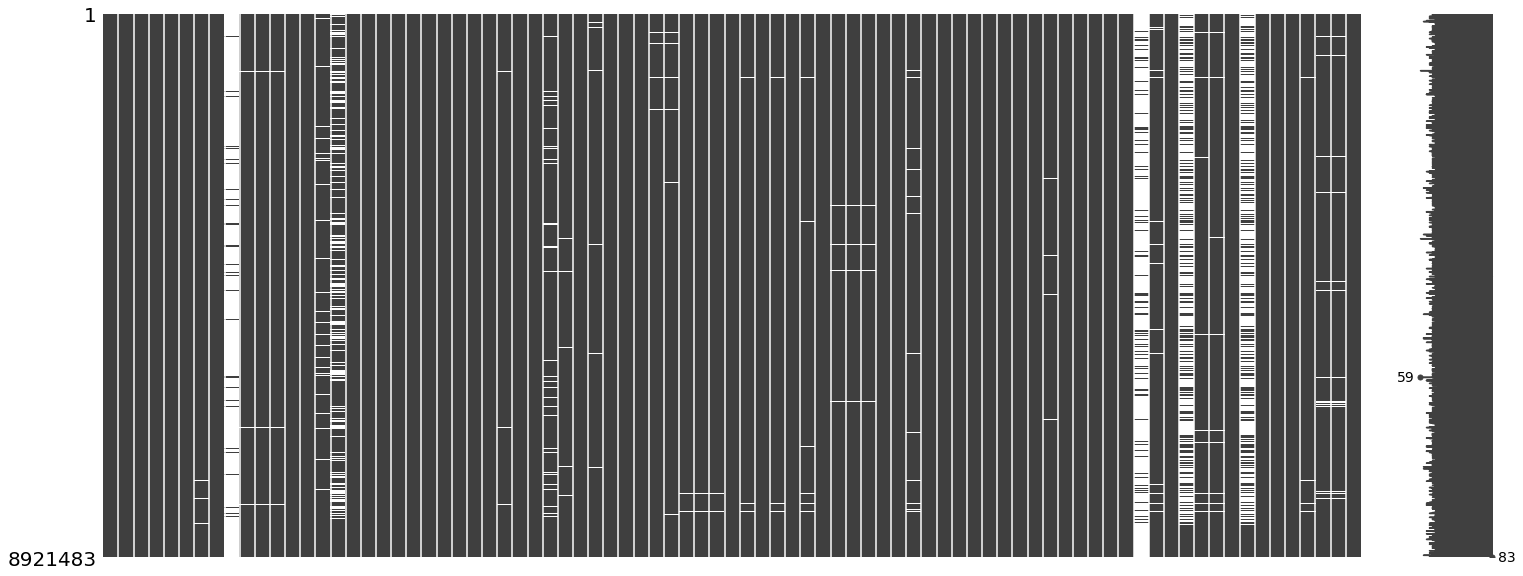

In [35]:
# View missing values
print(len(df_train))
msno.matrix(df_train)

# 検証

In [38]:
# individual variable and non-dividual variable
X = df_train.drop(["HasDetections"], axis=1).values # by number/ values --> serries
y = df_train.loc[:, "HasDetections"].values # by column's name

In [39]:
# for spliting train and test data
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3)

In [40]:
# check size
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

6245038
2676445
6245038
2676445


In [ ]:
train_small.head()

In [ ]:
TARGET = "HasDetections"

In [ ]:
f_list = ["CountryIdentifier"]
t_list = ["CountryIdentifier", ]

In [ ]:
model = LogisticRegression(C=1)
model.fit(X_train,y_train)

In [ ]:
train_small2 = train_small[f_list]

In [ ]:
#変換の前にテストデータとくっつける
df_train_test = train_small2.append(test[t_list])
df_train_test2 = pd.get_dummies(df_train_test, dummy_na=True)
df_train_test2 = df_train_test2.fillna({"Wdft_IsGamer":0})

In [ ]:
#分ける
train_small3 = df_train_test2.iloc[:train_small2.shape[0], :]
test_small = df_train_test2.iloc[train_small2.shape[0]:, :]
test_small = test_small.drop("HasDetections", axis=1)

In [ ]:
X = train_small3.drop(TARGET, axis=1).values
y = train_small3[TARGET].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from statistics import mean
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.preprocessing import LabelEncoder
import optuna
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [47]:
#グリッドサーチ
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

tuned_parameters = {'C': [1, 10, 100, 1000]}

clf = GridSearchCV(
    model, # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=3, # 交差検定の回数
    ) # モデルの評価関数の指定

clf.fit(X_train,y_train)

/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
clf.best_params_

In [ ]:
model = LogisticRegression(C=1)
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
auc

In [ ]:
y_pred = model.predict(test_small)

In [ ]:
submit = pd.read_csv("/Users/morio/diveintocode-ml/input/microsoft/sample_submission.csv")

In [ ]:
submit[TARGET] = y_pred

In [ ]:
submit.to_csv("/Users/morio/diveintocode-ml/input/microsoft/sub1.csv", index=False)

submit 0.542

#### バギング 

In [ ]:
from sklearn.ensemble import VotingClassifier
#バギング
svm =SVC(C=5, gamma=0.001, probability=True)

In [ ]:
vc_soft = VotingClassifier(estimators=[("svm", svm), ("lg", model)], voting='soft')

In [ ]:
vc_soft.fit(X_train, y_train)

In [ ]:
y_pred = vc_soft.predict(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)

In [ ]:
auc

#### ブースティング

In [ ]:
#ブースティング
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    #lgbmでモデル作成
lgb_params = {'objective':'binary', 
                 'boosting_type': 'rf',
                 'subsample': 0.623,
                  'colsample_bytree': 0.7,
                  'num_leaves': 127,
                  'max_depth': 8,
                  'seed': 99,
                  'bagging_freq': 1,
                  'n_jobs': 4,}
                                
model_lgb = lgb.train(lgb_params, lgb_train, valid_sets=lgb_eval)
y_pred = model_lgb.predict(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
auc